# **Import File**

### Import File

In [10]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = 'Data/Melbourne_housing_FULL.csv'
df = pd.read_csv(file_path)

# Printing how many rows the file has
row_count = len(df)

print(f'The DataFrame has {row_count} rows.')
# Preview the data
df


The DataFrame has 34857 rows.


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


# **Data Processing**

###Removing null values and dropping unecessarry columns

In [13]:
# Remove rows where critical columns have missing values
df = df.dropna(subset=['Price', 'Landsize', 'BuildingArea', 'Bedroom2', 'Bathroom', 'Car'])

# Drop unnecessary columns to simplify the dataset
df = df.drop(columns=['Rooms','Postcode', 'YearBuilt','Type','Propertycount', 'Longtitude', 'Lattitude',  'CouncilArea', 'Regionname', 'Suburb', 'Address', 'Method', 'SellerG', 'Date'])
row_count = len(df)

# Drop rows where Price is less than 100k or more than 10M
df = df[(df['Price'] >= 100000) & (df['Price'] <= 10000000)]

row_count2 = len(df)
print(f'The DataFrame has {row_count2} rows.')
df


The DataFrame has 9244 rows.


,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea
2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0
4,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0
6,1600000.0,2.5,3.0,1.0,2.0,120.0,142.0
11,1876000.0,2.5,4.0,2.0,0.0,245.0,210.0
14,1636000.0,2.5,2.0,1.0,2.0,256.0,107.0
...,...,...,...,...,...,...,...
34847,500000.0,25.5,3.0,2.0,2.0,383.0,118.0
34849,570000.0,25.5,3.0,2.0,2.0,404.0,158.0
34853,888000.0,6.3,2.0,2.0,1.0,98.0,104.0
34854,705000.0,6.3,2.0,1.0,2.0,220.0,120.0


### Checking for duplicates and removing them (None in this dataset

In [15]:
# Check for duplicates
duplicates = df.duplicated()
print(f"Number of duplicate rows is {duplicates.sum()}")

# Remove duplicate rows
df = df.drop_duplicates()

# Confirm duplicates have been removed
print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")

row_count3 = len(df)
print(f'The DataFrame has {row_count3} rows.')




Number of duplicate rows is 16
Number of duplicate rows after removal: 0
The DataFrame has 9228 rows.


### Data Normalisation

In [30]:
from sklearn.preprocessing import StandardScaler

# # Select required columns
# features = df[['Landsize', 'BuildingArea', 'Bedroom2', 'Bathroom', 'Car']]
# df = df.iloc[:,0:13]
# scaleMinMax = MinMaxScaler()

# # Scale each feature from 0 to 1
# scalef = scaleMinMax.fit_transform(features)
# scalefdf = pd.DataFrame(scalef, columns = features.columns)
# scalefdf.round(3)

scaler = StandardScaler()
df.loc[:, ['Bedroom2', 'Landsize']] = scaler.fit_transform(df[['Bedroom2', 'Landsize']])





# **Model Building**

## K-Means Clustering

### Creating the clusters

In [72]:
from sklearn.cluster import KMeans

# # Initialise K-Means with 4 clusters 
# kmeans = KMeans(n_clusters=100, random_state=42)

# # Predict clusters and add a new column to the dataframe
# kmeans.fit(scalefdf)

# df['Cluster'] = kmeans.labels_
# cluster_prices = df.groupby('Cluster')['Price'].mean()
# df

kmeans = KMeans(n_clusters=5, random_state=0)
df.loc[:, 'Cluster'] = kmeans.fit_predict(df[['Bedroom2', 'Landsize']])


df.loc[:, 'Price'] = df['Price'].astype(float)
cluster_prices = df.groupby('Cluster')['Price'].mean()
print(cluster_prices)




Cluster
0    1.040359e+06
1    8.088214e+05
2    1.867531e+06
3    7.141748e+05
4    1.389667e+06
Name: Price, dtype: float64


### Visualising the clusters with landsize and bedroom as example

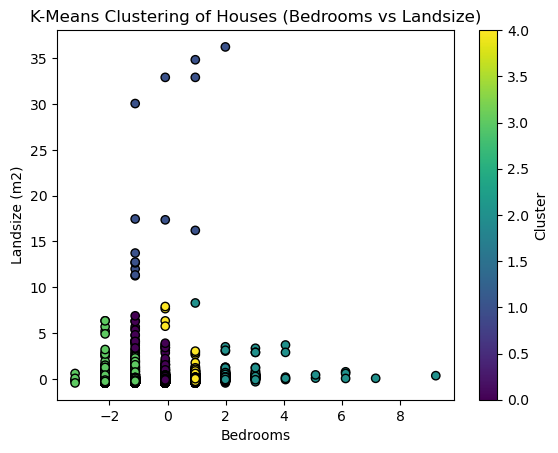

In [48]:
import matplotlib.pyplot as plt

# Scatter plot to visualise clusters based on bedrooms and landsize
plt.scatter(df['Bedroom2'], df['Landsize'], c=df['Cluster'], cmap='viridis', edgecolor='k')
plt.xlabel('Bedrooms')
plt.ylabel('Landsize (m2)')
plt.title('K-Means Clustering of Houses (Bedrooms vs Landsize)')
plt.colorbar(label='Cluster')
plt.show()

### Evaluating Model

In [54]:
# Analyze the characteristics of each cluster
cluster_analysis = df.groupby('Cluster').mean()
print(cluster_analysis)

                Price   Distance  Bedroom2  Bathroom       Car   Landsize  \
Cluster                                                                     
0        1.040359e+06  11.969514 -0.085414  1.540581  1.725701  -0.026912   
1        8.088214e+05  22.021429 -0.302516  1.857143  2.214286  20.835437   
2        1.867531e+06  12.502977  2.155832  2.807356  2.446585   0.214150   
3        7.141748e+05   7.580285 -1.277153  1.135906  1.104866  -0.191577   
4        1.389667e+06  13.434230  0.952343  2.101015  2.071460   0.066244   

         BuildingArea  cluster  
Cluster                         
0          140.670389      0.0  
1         3298.035714      1.0  
2          275.555861      2.0  
3           87.867672      3.0  
4          209.419816      4.0  


In [56]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score
silhouette_avg = silhouette_score(df, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: -0.1996579126270477


# **User Input**

In [90]:
def predict_price(Bedroom2, Landsize):
    # Create a DataFrame with column names to ensure compatibility with fitted scaler and model
    new_data = pd.DataFrame([[Bedroom2, Landsize]], columns=['Bedroom2', 'Landsize'])
    # Scale the input features
    scaled_features = scaler.transform(new_data)
    # Convert scaled features back into DataFrame with same column names for kmeans predict
    scaled_features_df = pd.DataFrame(scaled_features, columns=['Bedroom2', 'Landsize'])
    # Predict the cluster
    cluster = kmeans.predict(scaled_features_df)[0]
    # Return the average price of that cluster
    return cluster_prices[cluster]

# Example prediction
print("Predicted price:", predict_price(1, 15000))



Predicted price: 808821.4285714285


In [82]:
plt.scatter(data['number_of_bedrooms'], data['land_size'], c=data['cluster'], cmap='viridis')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Land Size')
plt.title('Clustering of Houses by Number of Bedrooms and Land Size')
plt.colorbar(label='Cluster')
plt.show()


NameError: name 'data' is not defined